# Домашняя работа №1. Купринов Кирилл, гр. ИАД-2

**Срок сдачи:** 9 октября 2017, 23:59 <br\>

При отправлении ДЗ в Dropbox указывайте фамилию в названии файла: <br\>
** IDA<Номер группы>HW1<Фамилия>.ipynb ** - например ** IDA1HW1Panov.ipynb **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('./titanium.csv')
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [3]:
scaler = StandardScaler()

In [4]:
# x_processed = (df['x'] - np.mean(df['x'])) / np.std(df['x'])
# y_processed = (df['y'] - np.mean(df['y'])) / np.std(df['y'])

x_processed = scaler.fit_transform(df['x'].values.reshape(-1, 1))
y = df['y'].values

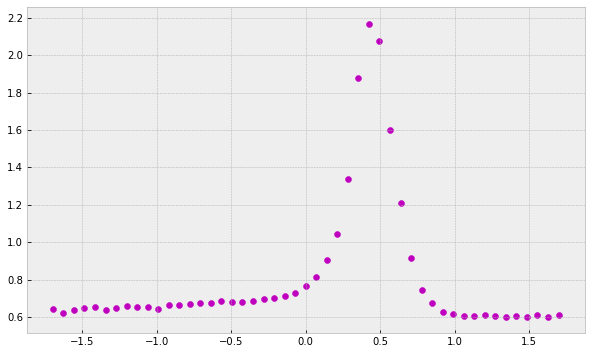

In [21]:
plt.scatter(x_processed, y, color='m');
plt.show()

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [6]:
EPSILON = 0.1
C = np.logspace(-4, 2, 10)

C = 0.000100		MAE = 0.19059
C = 0.000464		MAE = 0.19255
C = 0.002154		MAE = 0.19685
C = 0.010000		MAE = 0.19735
C = 0.046416		MAE = 0.19738
C = 0.215443		MAE = 0.19735
C = 1.000000		MAE = 0.19735
C = 4.641589		MAE = 0.19735
C = 21.544347		MAE = 0.19735
C = 100.000000		MAE = 0.19735

Min mae is 0.19059128061026806



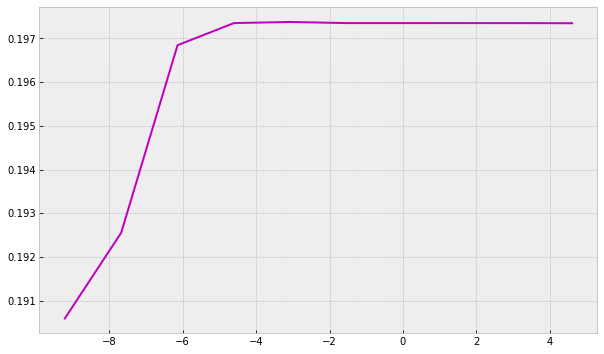

In [20]:
errors_lin = []
for c in C:
    clf = SVR(kernel = 'linear', C = c, epsilon = EPSILON)
    clf.fit(x_processed, y)
    errors_lin.append(mae(clf.predict(x_processed), np.ravel(y)))
    print('C = {c:6.6f}\t\tMAE = {mae:6.5f}'.format(c=c, mae=errors_lin[-1]))

print('\nMin mae is {}\n'.format(np.min(errors_lin)))

plt.plot(np.log(C), np.array(errors_lin), color='m');
plt.show()

C = 0.000100		MAE = 0.18870
C = 0.000464		MAE = 0.18540
C = 0.002154		MAE = 0.17249
C = 0.010000		MAE = 0.17244
C = 0.046416		MAE = 0.17322
C = 0.215443		MAE = 0.17322
C = 1.000000		MAE = 0.17324
C = 4.641589		MAE = 0.17330
C = 21.544347		MAE = 0.17360
C = 100.000000		MAE = 0.17455

Min mae is 0.17243737071121493



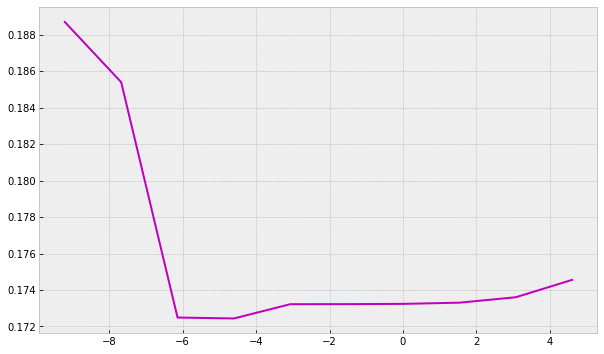

In [35]:
errors_poly = []
for c in C:
    clf = SVR(kernel = 'poly', C = c, epsilon = EPSILON, degree = 3, gamma = 6, coef0 = 1)
    clf.fit(x_processed, y)
    errors_poly.append(mae(clf.predict(x_processed), y))
    print('C = {c:6.6f}\t\tMAE = {mae:6.5f}'.format(c=c, mae=errors_poly[-1]))

print('\nMin mae is {}\n'.format(np.min(errors_poly)))
    
plt.plot(np.log(C), np.array(errors_poly), color='m');
plt.show()

C = 0.000100		MAE = 0.18990
C = 0.000464		MAE = 0.18956
C = 0.002154		MAE = 0.18933
C = 0.010000		MAE = 0.18710
C = 0.046416		MAE = 0.16867
C = 0.215443		MAE = 0.12469
C = 1.000000		MAE = 0.09893
C = 4.641589		MAE = 0.08041
C = 21.544347		MAE = 0.07299
C = 100.000000		MAE = 0.07246

Min mae is 0.07246448598169641



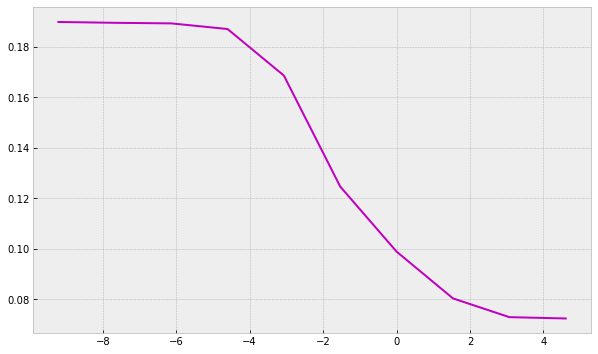

In [18]:
errors_rbf = []
for c in C:
    clf = SVR(kernel = 'rbf', C = c, epsilon = EPSILON, gamma = 6, coef0 = 1)
    clf.fit(x_processed, y)
    errors_rbf.append(mae(clf.predict(x_processed), y))
    print('C = {c:6.6f}\t\tMAE = {mae:6.5f}'.format(c=c, mae=errors_rbf[-1]))

print('\nMin mae is {}\n'.format(np.min(errors_rbf)))
    
plt.plot(np.log(C), np.array(errors_rbf), color='m');
plt.show()

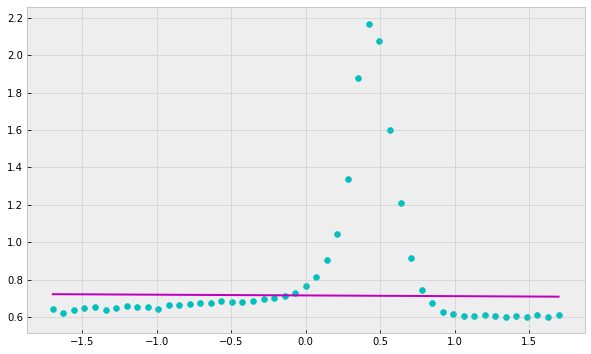

In [17]:
clf_ = SVR(kernel='linear', degree=1, C=C[1], epsilon=EPSILON)
clf_.fit(x_processed, y)

plt.scatter(x_processed, y, color='c');
plt.plot(x_processed, clf_.predict(x_processed), color='m');
plt.show()

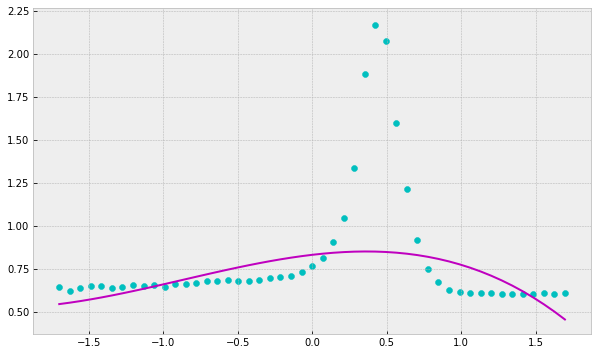

In [41]:
clf_ = SVR(kernel='poly', C=0.03, epsilon = EPSILON, degree = 3, gamma = 6, coef0 = 1)
clf_.fit(x_processed, y)

plt.scatter(x_processed, y, color='c');
plt.plot(x_processed, clf_.predict(x_processed), color='m');
plt.show()

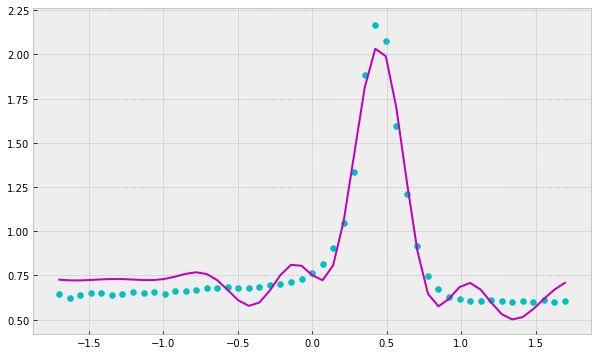

In [15]:
clf_ = SVR(kernel = 'rbf', C = C[-1], epsilon = EPSILON, gamma = 6, coef0 = 1)
clf_.fit(x_processed, y)

plt.scatter(x_processed, y, color='c');
plt.plot(x_processed, clf_.predict(x_processed), color='m');
plt.show()

При выборе линейного ядра модель недообучилась. 

При выборе RBF ядра - переобучилась.

Самый адекватный вариант получился с полиномиальным ядром.

Чем больше C, тем слабее параметр регуляризации, происходит переобучение (как в примере с ядром RBF). Чем C меньше, тем регуляризация сильнее, возникает недообучение (как с линейным ядром). 

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [45]:
# like this

df.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [ ]:
RND_SEED = 


## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

In [47]:
RND_SEED = 


### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.